# Análisis de componentes principales

Realice el Análisis de Componentes Principales para este conjunto de datos. Tome como ejemplo los notebooks proporcionados. Suba un PDF con el notebook con su análisis.

## Librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Obtener los datos

In [2]:
students= pd.read_csv('StudentsPerformance.csv')

In [3]:
students.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df = pd.DataFrame(students[['math score', 'reading score',
       'writing score']])

In [6]:
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


## Visualización PCA

Como hemos notado antes es difícil visualizar datos altamente dimensionales, podemos usar PCA para encontrar los dos primeros componentes principales, y visualizar los datos en este nuevo espacio bidimensional con un único diagrama de dispersión. Sin embargo, antes de hacer esto, necesitaremos escalar nuestros datos para que cada característica tenga una única unidad de varianza.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

PCA con Scikit Learn utiliza un proceso muy similar a otras funciones de preprocesamiento que vienen con SciKit Learn. Instalamos un objeto PCA, buscamos los componentes principales usando el método fit, luego aplicamos la reducción de rotación y dimensionalidad llamando a transform ().

También podemos especificar cuántos componentes queremos conservar al crear el objeto PCA.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
pca.fit(scaled_data)

PCA(n_components=2)

Ahora podemos transformar estos datos en sus primeros 2 componentes principales.

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(1000, 3)

In [15]:
x_pca.shape

(1000, 2)

Text(0, 0.5, 'Segundo Componente Principal')

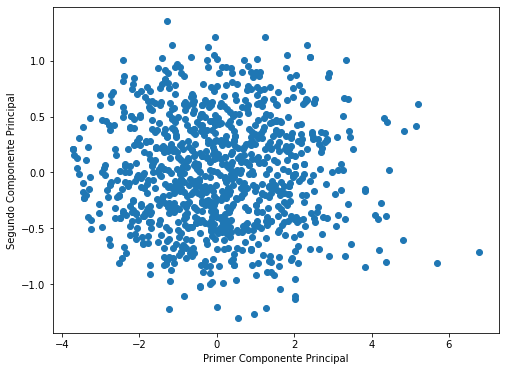

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

Claramente, al utilizar estos dos componentes, podemos separar fácilmente estas dos clases.

## Interpretación de los componentes

Desafortunadamente, con este gran poder de reducción de dimensionalidad, viene el costo de poder entender fácilmente lo que representan estos componentes.

Los componentes corresponden a combinaciones de las características originales, los componentes mismos se almacenan como un atributo del objeto PCA ajustado:

In [17]:
#cnt de componentes
pca.n_components

2

In [18]:
pca.components_

array([[-0.55472493, -0.58988468, -0.58678473],
       [ 0.83109952, -0.35942826, -0.42436413]])

En esta matriz numpy, cada fila representa un componente principal, y cada columna se relaciona con las características originales. podemos visualizar esta relación con un mapa de calor:

In [19]:
df_comp = pd.DataFrame(pca.components_)

<AxesSubplot:>

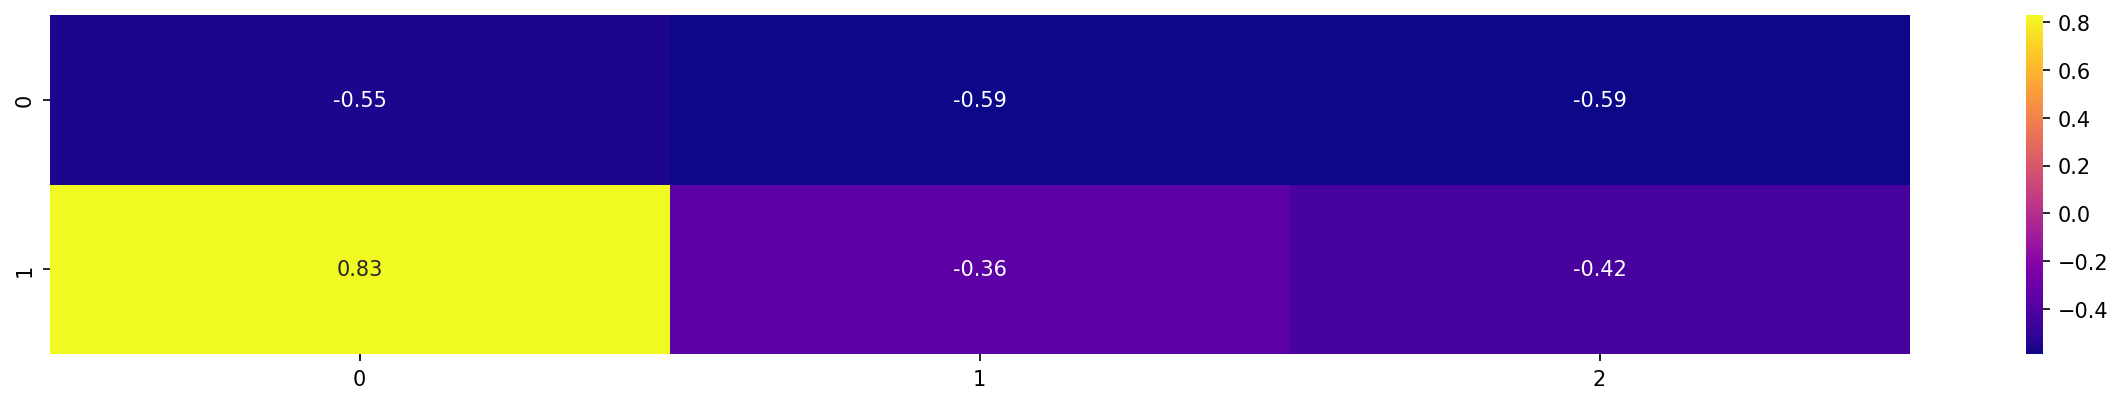

In [20]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,cmap='plasma',annot=True)

Este mapa de calor y la barra de color básicamente representan la correlación entre las diversas características y el componente principal en sí.

## Varianza Explicada

In [21]:
pca.explained_variance_ratio_

array([0.90614325, 0.07886171])

In [22]:
np.sum(pca.explained_variance_ratio_)

0.985004959787463

In [23]:
pca_3=PCA(n_components=3)
pca_3.fit(scaled_data)

PCA(n_components=3)

In [24]:
pca_3.explained_variance_ratio_

array([0.90614325, 0.07886171, 0.01499504])

In [25]:
np.sum(pca_3.explained_variance_ratio_)

1.0

In [26]:
#Encontrar la cnt de componentes con la mayor varianza explicada
varianza_explicada=[]
for n in range(1,4):
    pca=PCA(n_components=n)
    pca.fit(scaled_data)
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varianza Explicada')

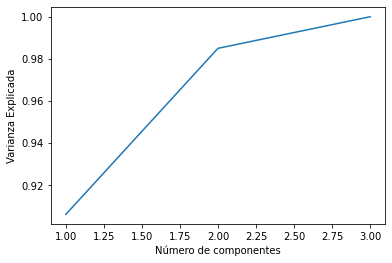

In [27]:
plt.plot(range(1,4),varianza_explicada)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza Explicada")

### Conclusión

Esperamos que esta información sea útil para usted cuando se trata de datos de alta dimensión.

# ¡Buen trabajo!